In [1]:
%matplotlib inline
import pyfolio as pf

In [10]:
from datetime import datetime
import pytz
from pandas import Timestamp

In [11]:
from zipline import run_algorithm
from zipline.api import order_target, record, symbol

In [73]:
from zipline.algorithm import TradingAlgorithm

In [74]:
#!zipline ingest
!zipline bundles

quandl <no ingestions>
quantopian-quandl 2017-09-26 15:47:48.566802
quantopian-quandl 2017-09-26 15:37:43.163743
quantopian-quandl 2017-09-26 15:37:02.121343


In [22]:
def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 300 days to get full windows
    context.i += 1
    if context.i < 300:
        return

    # Compute averages
    # data.history() has to be called with the same params
    # from above and returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price', bar_count=100, frequency="1d").mean()
    long_mavg = data.history(context.asset, 'price', bar_count=300, frequency="1d").mean()

    # Trading logic
    if short_mavg > long_mavg:
        # order_target orders as many shares as needed to
        # achieve the desired number of shares.
        order_target(context.asset, 100)
    elif short_mavg < long_mavg:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(AAPL=data.current(context.asset, 'price'),
           short_mavg=short_mavg,
           long_mavg=long_mavg)

In [110]:
tz = pytz.timezone("US/Mountain")
start = datetime(2016, 10, 1, tzinfo=tz)
end = datetime(2017, 9, 25, tzinfo=tz)

results = run_algorithm(
    start,
    end,
    capital_base=10000,
    initialize=initialize,
    handle_data=handle_data,
)

Entire data start date: 2016-10-03
Entire data end date: 2017-09-22
Backtest months: 11


,Backtest
Annual return,0.0%
Cumulative returns,0.0%
Annual volatility,0.0%
Sharpe ratio,NaN
Calmar ratio,NaN
Stability,0.00
Max drawdown,0.0%
Omega ratio,NaN
Sortino ratio,NaN
Skew,0.00


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,0.00,2016-10-03,2016-10-03,2016-10-03,1
1,0.00,2016-10-03,2016-10-03,2016-10-03,1
2,0.00,2016-10-03,2016-10-03,2016-10-03,1
3,0.00,2016-10-03,2016-10-03,2016-10-03,1
4,0.00,2016-10-03,2016-10-03,2016-10-03,1


KeyError: "None of [DatetimeIndex(['2016-10-03 20:00:00+00:00', '2016-10-04 20:00:00+00:00',\n               '2016-10-05 20:00:00+00:00', '2016-10-06 20:00:00+00:00',\n               '2016-10-07 20:00:00+00:00', '2016-10-10 20:00:00+00:00',\n               '2016-10-11 20:00:00+00:00', '2016-10-12 20:00:00+00:00',\n               '2016-10-13 20:00:00+00:00', '2016-10-14 20:00:00+00:00',\n               ...\n               '2017-09-11 20:00:00+00:00', '2017-09-12 20:00:00+00:00',\n               '2017-09-13 20:00:00+00:00', '2017-09-14 20:00:00+00:00',\n               '2017-09-15 20:00:00+00:00', '2017-09-18 20:00:00+00:00',\n               '2017-09-19 20:00:00+00:00', '2017-09-20 20:00:00+00:00',\n               '2017-09-21 20:00:00+00:00', '2017-09-22 20:00:00+00:00'],\n              dtype='datetime64[ns, UTC]', length=246, freq=None)] are in the [index]"

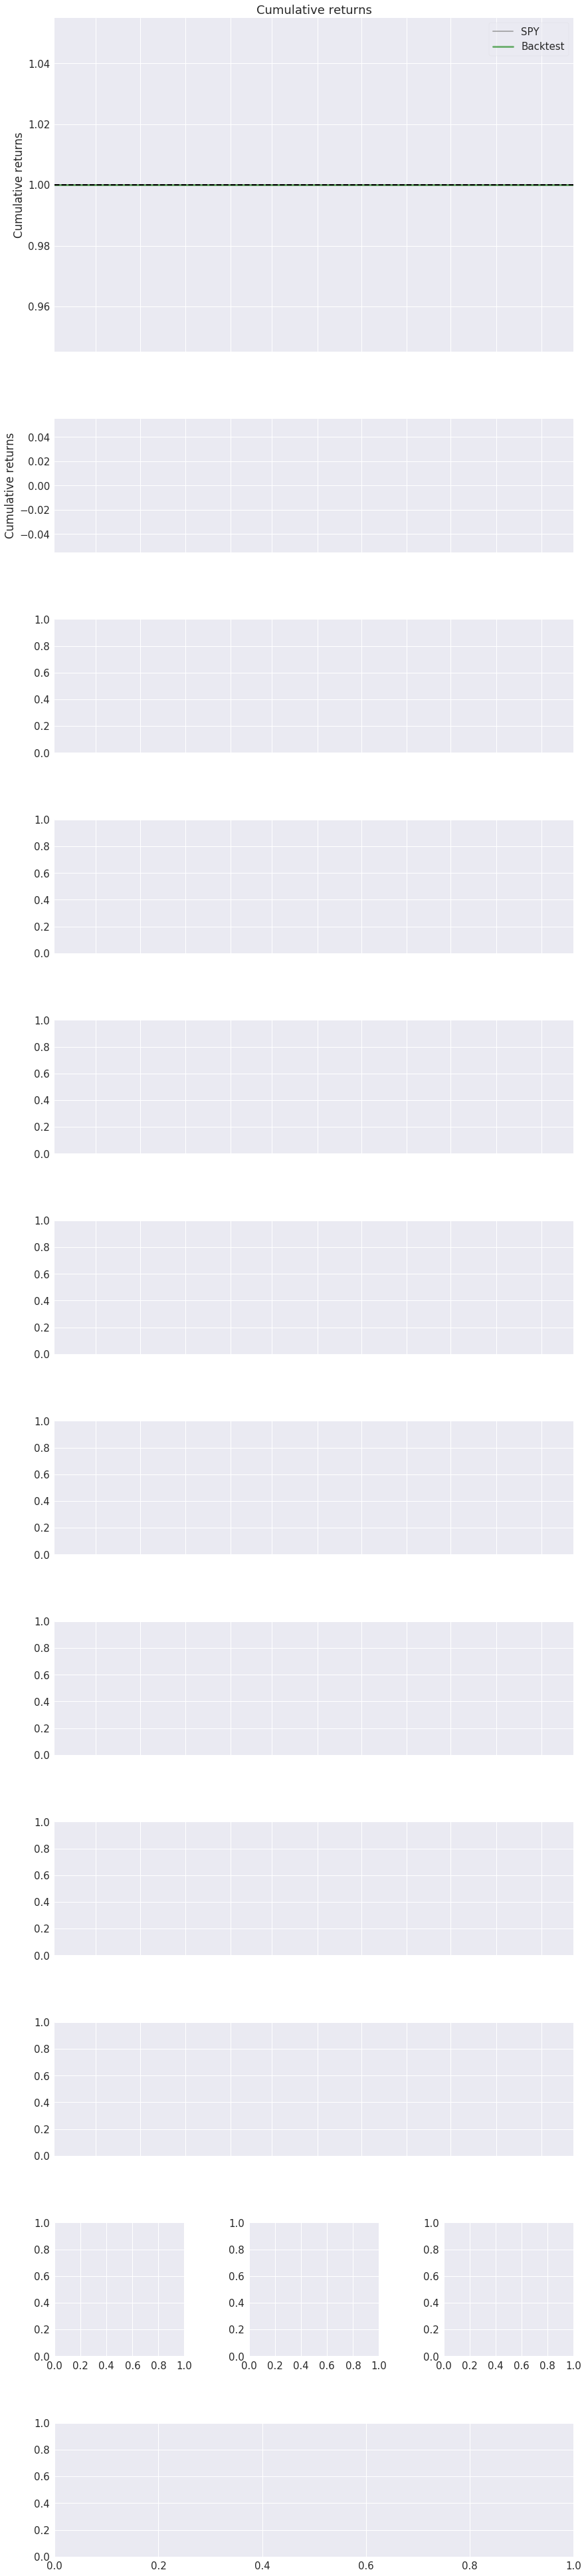

In [109]:
pf.create_full_tear_sheet(results.returns)

In [108]:
pf.create_full_tear_sheet(results.returns, positions=results.positions, transactions=results.transactions, 
                          live_start_date='2017-8-25', round_trips=True)

AttributeError: 'SeriesGroupBy' object has no attribute 'symbol'